<h1> EXPONENTIALLY WEIGHTED AVERAGES </h1>
<p>
    All the points may seem <em>close</em> to one another. But, they are all distinct to each other. It is a unique number for each point. The <i>'moving'</i> average will <strong>denoise</strong> the data and bring it closer to the original function. 
</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import HTML
import warnings 
warnings.simplefilter('ignore')
%matplotlib inline

# Setting the figure size
plt.figure(figsize=(8,8))

#first generate some datapoint for a randomly sampled noisy sinewave
x = np.random.random(1000)*10

# Generating random noise
noise = np.random.normal(scale=0.3,size=len(x))

# Defining the function
y = np.sin(x) + noise

# Plot the data
plt.plot(x,y,'ro',alpha=0.3,ms=4,label='data')
plt.xlabel('Time')
plt.ylabel('Intensity')

# Define a moving average function
def moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))
    
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

# Plot the moving average
bins, average = moving_average(x,y)
_ = plt.plot(bins, average,label='width->1.0',color='b',marker='*')

bins, average = moving_average(x,y,width=0.1)
_ = plt.plot(bins, average,label='width->0.1',color='g',marker='+')

plt.legend(loc=3)
#_ = plt.axis('equal')
_ = plt.axis([(0), (3*math.pi+1e-4), -2, 2])

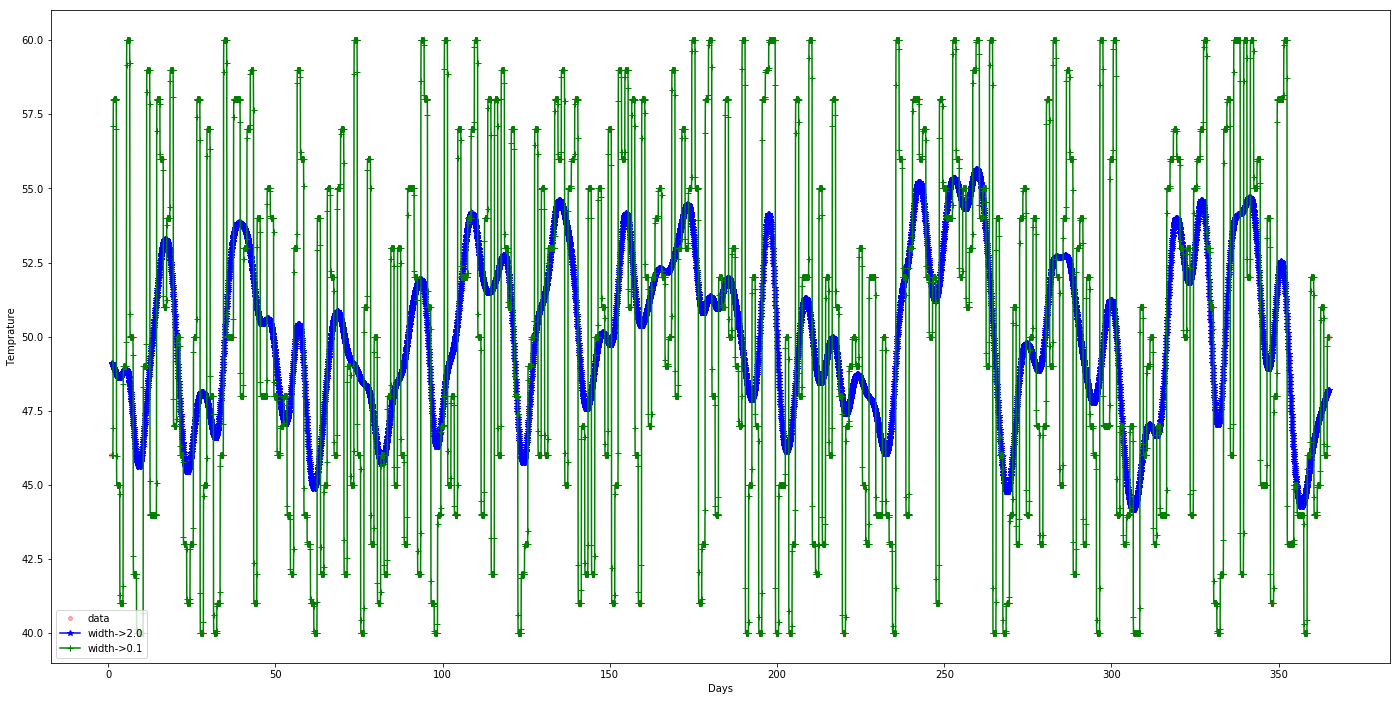

In [2]:
import random
y = [] # Randomly stored temprature data.
x = np.zeros(365)
t = 0
for n in range(365):
    y.append(random.randint(40,60))
    x[n] = n+1

plt.figure(figsize=(24,12))

# Plot the data
plt.plot(x,y,'ro',alpha=0.3,ms=4,label='data')
plt.xlabel('Days')
plt.ylabel('Temprature')

# Define a moving average function
def moving_average(x,y,step_size=0.05,width=2):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))
    
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

# Plot the moving average
bins, average = moving_average(x,y)
_ = plt.plot(bins, average,label='width->2.0',color='b',marker='*')

bins, average = moving_average(x,y,width=0.1)
_ = plt.plot(bins, average,label='width->0.1',color='g',marker='+')

_ = plt.legend(loc=3)

<p> 
   In this case, we have the following scenario:
   $\theta_{i}$ being the Temprature on the $i^{th}$ day. Then, the formula
   to evaluvate the moving averages is as follows:<br>
   $v_{0} = 0$<br>$v_{i}=\beta v_{i-1} + (1-\beta)\theta_{i}$<br>
   So, the value of $\beta$ is taken as $0.9$ in general. Hence, we have,
   <br>
   $v_{1} = 0.9v_{0} + 0.1\theta_{1}$
   <br>
   $v_{2} = 0.9v_{1} + 0.1\theta_{2}$
   <br>
   $v_{3} = 0.9v_{2} + 0.1\theta_{3}$
   <br>
   $\cdot$
   <br>
   $\cdot$
 </p>
 <p>
 Theoretically, $v_{i}$ is approximately average over the last $\frac{1}{1-\beta}$ days or $\frac{1}{0.1} \approx 10$ days. So, the first 9 data points suffer from noise but sooner, they tend to get the overall layout of the change and make a meaningful result out of it.
 </p>
 
 __Effect of__ $\beta$
 
<p>
As the value of $\beta$ decreases, we smooth the approximation. Here the value $\beta$ is also known /as the <b>width</b>. This is intutive as we can tell that when the <b>width</b>($\beta$) decreases, the average is taken at longer intervals. Hence, a smoothing effect of the noisy data takes place.
<br>Thus,<br> 
    <strong>SMALL</strong> values of $\beta$ -> SMOOTH CURVE, SLOW
    CHANGES<br>
    <strong>LARGE</strong> values of $\beta$ -> RIDGY CURVE, RAPID CHANGES
<br>
</p>

<h2> Resources </h2>

The video by __Deep Learning AI__ is very useful. 

In [3]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/lAq96T8FkTw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')